# Regularized linear regression methods

### Ridge Regression

In [11]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
%matplotlib inline

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [13]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [15]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [17]:
newX=boston_df.drop('Price',axis=1)
newX[0:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [18]:
newY=boston_df['Price']
type(newY)# pandas core frame/

pandas.core.series.Series

In [19]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
len(X_test), len(y_test)

(152, 152)

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
rr = Ridge(alpha=0.01)  # higher the alpha value, more restriction on the coefficients; 
                        #low alpha > more generalization, 
                        #coefficients are barely restricted 
                        #in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
rr100 = Ridge(alpha=100) # comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [26]:
print( "linear regression train score:", train_score)
print( "linear regression test score:", test_score)
print( "ridge regression train score low alpha:", Ridge_train_score)
print( "ridge regression test score low alpha:", Ridge_test_score)
print( "ridge regression train score high alpha:", Ridge_train_score100)
print( "ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576854
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123904
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921933


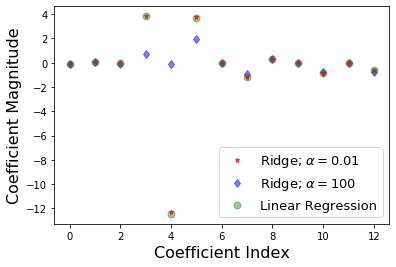

In [27]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [28]:
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
test_r2score=r2_score(y_test, lr.predict(X_test))
Ridge_test_r2score = r2_score(y_test, rr.predict(X_test))
Ridge_test_r2score100 = r2_score(y_test, rr100.predict(X_test))

In [33]:
test_r2score,Ridge_test_r2score,Ridge_test_r2score100,

(0.7147895265576854, 0.7146125373123905, 0.6805765856921933)

In [34]:
mean_squared_error(y_test, lr.predict(X_test)), mean_squared_error(y_test, rr.predict(X_test)), mean_squared_error(y_test, rr100.predict(X_test))

(22.4319360707375, 22.445856357000984, 25.12279974423392)

### Lasso Regression

In [35]:
import math 

In [36]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [37]:
cancer = load_breast_cancer()
#print cancer.keys()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#print cancer_df.head(3)
X = cancer.data
Y = cancer.target

In [52]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [39]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)


In [41]:
print( "training score:", train_score )
print( "test score: ", test_score)
print( "number of features used: ", coeff_used)

training score: 0.5600974529893079
test score:  0.5832244618818156
number of features used:  4


In [42]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [44]:
print( "training score for alpha=0.01:", train_score001 )
print( "test score for alpha =0.01: ", test_score001)
print( "number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7037865778498827
test score for alpha =0.01:  0.6641831577726227
number of features used: for alpha =0.01: 10


In [45]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [46]:
print( "training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print( "number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.77540920069367
test score for alpha =0.0001:  0.7318608210757915
number of features used: for alpha =0.0001: 22


In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [48]:
print( "LR training score:", lr_train_score )
print( "LR test score: ", lr_test_score)

LR training score: 0.7842206194055071
LR test score:  0.7329325010888679


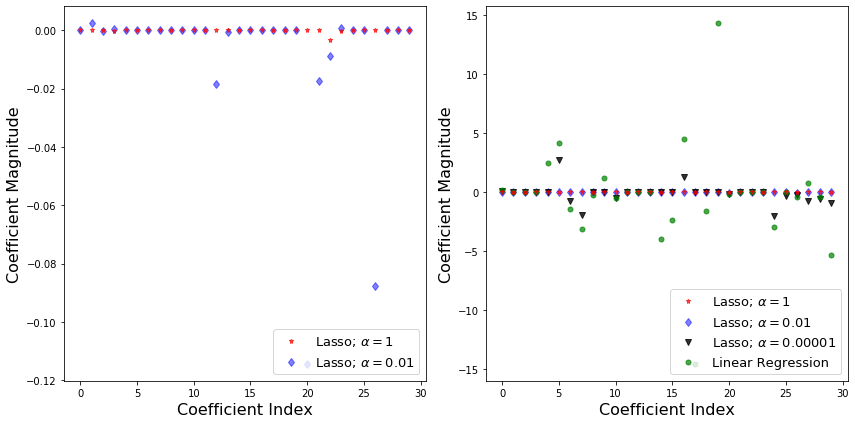

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

## Elastic Net

In [122]:
import seaborn as sns

In [53]:
from sklearn.datasets import make_regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

In [55]:
from sklearn.model_selection import GridSearchCV

In [179]:
X, y = make_regression(n_samples=250, n_features=10, n_informative=5 , n_targets=1, bias=50, noise=50)

In [180]:
df= pd.DataFrame(X)
df['traget']= y

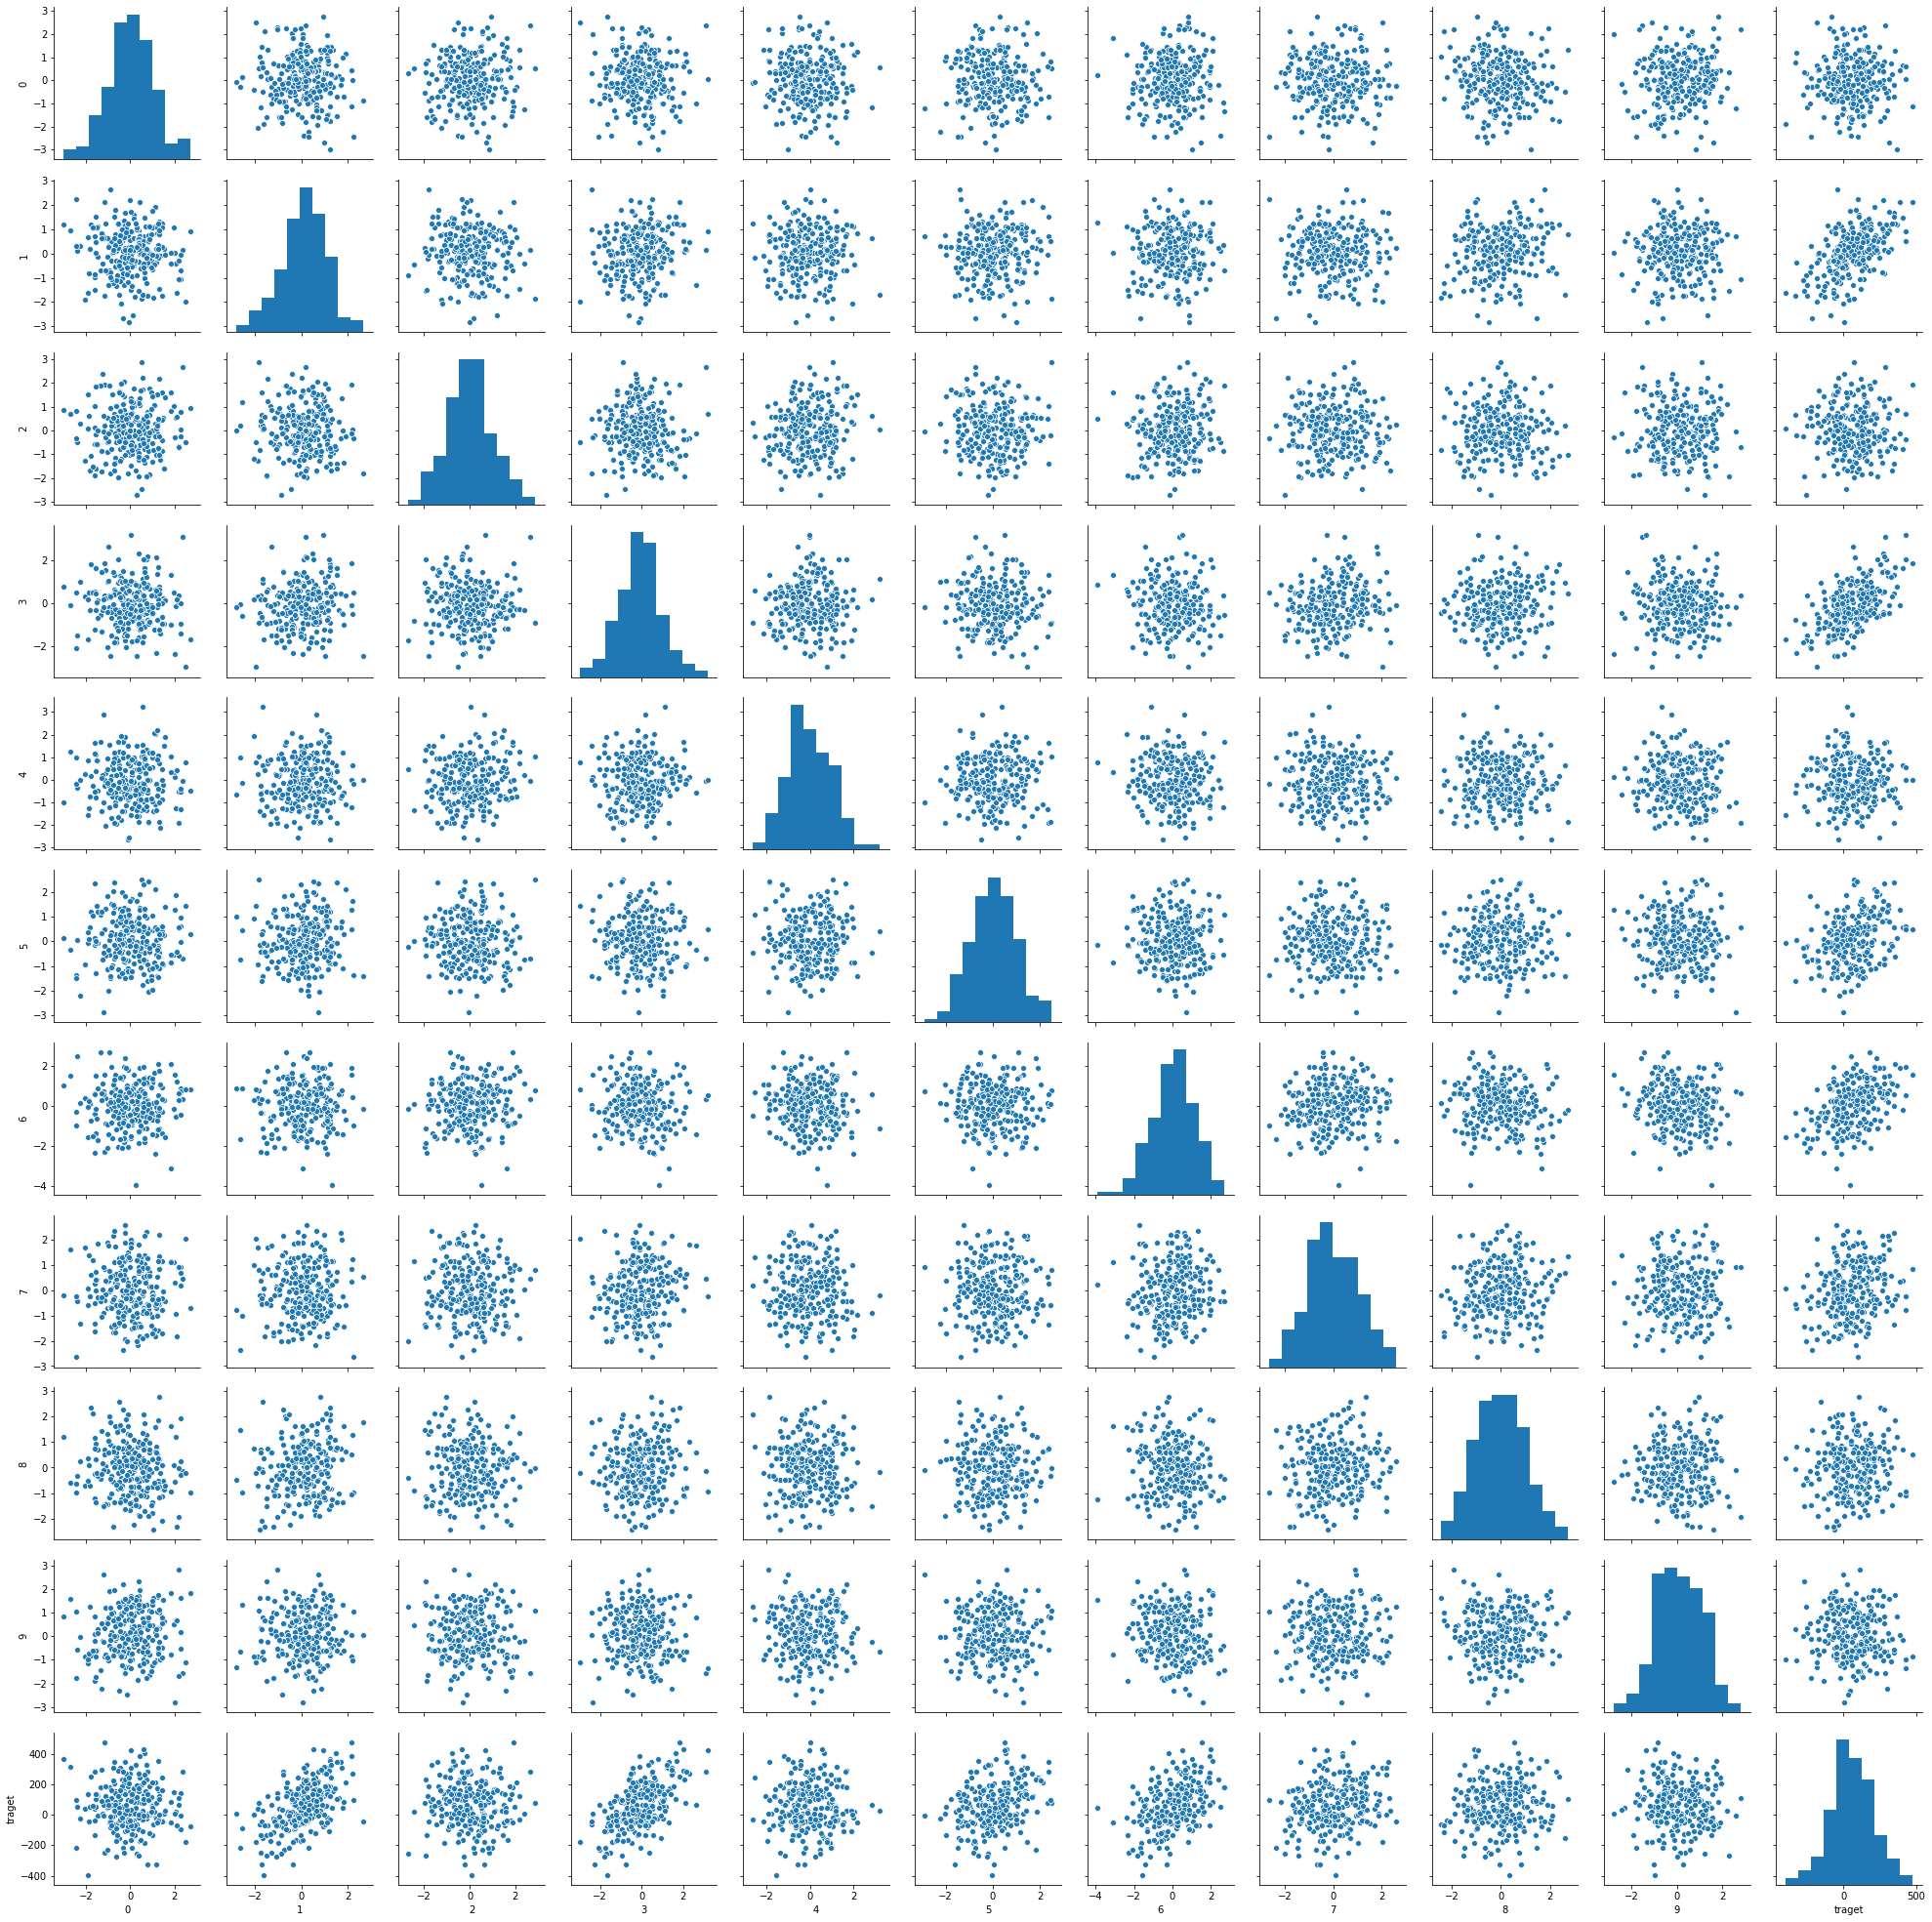

In [181]:
sns.pairplot(df)

In [182]:
lr = LinearRegression()

In [196]:
from sklearn.model_selection import cross_val_score

In [199]:
cross_val_score(lr,X,y,cv=5).mean()

0.8679107015963154

In [185]:
rr= Ridge()

In [186]:
rr.fit(X,y)
rr.score(X,y)

0.8836111868965741

In [187]:
ls= Lasso()

In [188]:
ls.fit(X,y)
ls.score(X,y)

0.8832114984505354

In [189]:
en= ElasticNet()

In [190]:
en.fit(X,y)
en.score(X,y)

0.7954994942427568

In [209]:
params={'alpha':[0.001,0.01,0.1,1,10,100],
        'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],}
gs= GridSearchCV(en,param_grid=params,cv=5)

In [207]:
gs.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [208]:
gs.best_score_

0.8686424987193336

In [205]:
gs.best_params_

{'alpha': 0.1, 'l1_ratio': 0.8}